# Genre Gini Coeff

This notebook looks at the gini coefficient of appearances across genres. As with the other genre analysis, we based our list of high-level genres on a wikipedia list, then added additional ones based off of frequently occuring groups.

#### Genres
From wikipedia list:
    - Afro (not included)
    - Comedy (not include)
    - Avant-garde (not included)
    - Blues
    - Caribbean and Caribbean-influenced (not included)
    - Easy Listening (not included)
    - Country 
    - Electronic
    - Folk
    - Flamenco (not included)
    - Hip Hop
    - Jazz 
    - Latin
    - Pop
    - R&B and Soul
    - Rock
Added:
    - House
    - Rap
    - Indie

In [6]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import matplotlib.pyplot as plt

from analysis_utils import get_num_appearances, get_all_entries, gini,\
    track_concentration_ratio

from analysis_utils import get_label_count, \
    get_genres, get_genre_list

In [7]:
# get dataframe with all entries
data = pd.read_csv('../spotify_data/all_tracks.csv')

In [8]:
# organize tracks into their respective genres
pd.options.mode.chained_assignment = None

hip_list = get_genre_list(data,'hip hop')
hip_hop = data.iloc[hip_list,:]
hip_hop['genre'] = 'hh'
hip_hop.name = 'hip_hop'

rock_list = get_genre_list(data,'rock')
rock = data.iloc[rock_list,:]
rock['genre'] = 'rk'
rock.name = 'rock'

blues_list = get_genre_list(data,'blues')
blues = data.iloc[blues_list,:]
blues['genre'] = 'bl'
blues.name = 'blues'

country_list = get_genre_list(data,'country')
country = data.iloc[country_list,:]
country['genre'] = 'ct'
country.name = 'country'

electronic_list = get_genre_list(data,'(electronic)|(edm)')
electronic = data.iloc[electronic_list,:]
electronic['genre'] = 'el'
electronic.name = 'electronic'

folk_list = get_genre_list(data,'folk')
folk = data.iloc[folk_list,:]
folk['genre'] = 'fk'
folk.name = 'folk'

jazz_list = get_genre_list(data,'jazz')
jazz = data.iloc[jazz_list,:]
jazz['genre'] = 'jz'
jazz.name = 'jazz'

latin_list = get_genre_list(data,'latin')
latin = data.iloc[latin_list,:]
latin['genre'] ='la'
latin.name = 'latin'

pop_list = get_genre_list(data,'pop')
pop = data.iloc[pop_list,:]
pop['genre'] = 'pp'
pop.name = 'pop'

r_b_list = get_genre_list(data,'(r&b)|(soul)')
r_b = data.iloc[r_b_list,:]
r_b['genre'] = 'rb'
r_b.name = "r&b/soul"

indie_list = get_genre_list(data,'indie')
indie = data.iloc[indie_list,:]
indie['genre'] = 'in'
indie.name = 'indie'

house_list = get_genre_list(data,'house')
house = data.iloc[house_list,]
house['genre'] = 'hs'
house.name = 'house'

rap_list = get_genre_list(data,'rap')
rap = data.iloc[rap_list,]
rap['genre'] = 'rp'
rap.name = 'rap'

In [26]:
# get number of entries in each genre
genre_list = [hip_hop, pop, rock, blues, rap, country, electronic, folk, indie, jazz, latin, r_b, house]
genre_lengths = []
for df_genre in genre_list:
    print('%s: %d tracks' % (str(df_genre.name), len(df_genre)))
    genre_lengths.append(len(df_genre))

hip_hop: 18369 tracks
pop: 109776 tracks
rock: 19571 tracks
blues: 670 tracks
rap: 28990 tracks
country: 4468 tracks
electronic: 32664 tracks
folk: 13430 tracks
indie: 22355 tracks
jazz: 2696 tracks
latin: 11356 tracks
r&b/soul: 13698 tracks
house: 43592 tracks


In [16]:
df_all = get_all_entries('spotify_curated', ['track_name', 'track_id'])

In [18]:
# calculate gini coefficient for solely the tracks in each genre
gini_coeffs = []
for df_genre in genre_list:
    df_genre_temp = df_genre.drop_duplicates(['track_id'])
    appearances = []
    
    for index, row in df_genre_temp.iterrows():   
        count = len(df_all[df_all['track_id'] == row['track_id']])
        if count != 0:
            appearances.append(count)
            
    appearances_temp = np.asarray(appearances)
    gini_coeffs.append(gini(appearances_temp))

In [25]:
for df_genre, gini_coeff in zip(genre_list, gini_coeffs):
    print('%s gini: %f' % (str(df_genre.name), gini_coeff))

hip_hop gini: 0.525375
pop gini: 0.511412
rock gini: 0.517274
blues gini: 0.493628
rap gini: 0.512662
country gini: 0.485668
electronic gini: 0.446856
folk gini: 0.377754
indie gini: 0.452293
jazz gini: 0.236929
latin gini: 0.576925
r&b/soul gini: 0.527173
house gini: 0.456588


Text(0, 0.5, 'Gini coefficient')

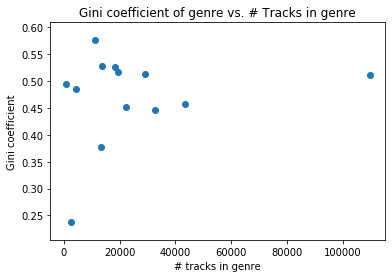

In [30]:
# plot gini coeff vs. length of genre
plt.title('Gini coefficient of genre vs. # Tracks in genre')
plt.scatter(genre_lengths, gini_coeffs)
plt.xlabel('# tracks in genre')
plt.ylabel('Gini coefficient')